In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

## Importing train and test dataset

In [117]:
df_train = pd.read_csv('train.csv', index_col= 0)
df_test = pd.read_csv('test.csv', index_col= 0)

## Data Infos

In [118]:
df_train.shape

(103904, 24)

In [119]:
df_train.tail()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied
103903,62567,Male,Loyal Customer,27,Business travel,Business,1723,1,3,3,...,1,1,1,4,4,3,1,0,0.0,neutral or dissatisfied


In [120]:
df_train.dtypes

id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival De

## Substituindo Valores não numéricos por numéricos

In [121]:
label_encoder = LabelEncoder()

colunas = df_train.columns
for column in colunas:
  if df_train[column].dtypes != 'int64' and df_train[column].dtypes != 'float64':
    df_train[column] = label_encoder.fit_transform(df_train[column])
    df_test[column] = label_encoder.fit_transform(df_test[column])

df_train.tail()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
103899,94171,0,1,23,0,1,192,2,1,2,...,2,3,1,4,2,3,2,3,0.0,0
103900,73097,1,0,49,0,0,2347,4,4,4,...,5,5,5,5,5,5,4,0,0.0,1
103901,68825,1,1,30,0,0,1995,1,1,1,...,4,3,2,4,5,5,4,7,14.0,0
103902,54173,0,1,22,0,1,1000,1,1,1,...,1,4,5,1,5,4,1,0,0.0,0
103903,62567,1,0,27,0,0,1723,1,3,3,...,1,1,1,4,4,3,1,0,0.0,0


## Tirando NaN

In [122]:
df_train.isna().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

Dado o significado da coluna em que há NaN presente, substitui-se os valores NaN por 0 para indicar que não houve atraso

In [123]:
df_train.fillna(0, inplace= True)
df_test.fillna(0, inplace= True)

df_train.tail()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
103899,94171,0,1,23,0,1,192,2,1,2,...,2,3,1,4,2,3,2,3,0.0,0
103900,73097,1,0,49,0,0,2347,4,4,4,...,5,5,5,5,5,5,4,0,0.0,1
103901,68825,1,1,30,0,0,1995,1,1,1,...,4,3,2,4,5,5,4,7,14.0,0
103902,54173,0,1,22,0,1,1000,1,1,1,...,1,4,5,1,5,4,1,0,0.0,0
103903,62567,1,0,27,0,0,1723,1,3,3,...,1,1,1,4,4,3,1,0,0.0,0


## Finalizando o dataset e criando os targets

id não é uma informação relevante para interferir na satisfação do cliente

In [124]:
df_train = df_train.drop('id', axis= 1)
df_test = df_test.drop('id', axis= 1)

df_train_target = df_train['satisfaction']
df_test_target = df_test['satisfaction']
df_train = df_train.drop('satisfaction', axis= 1)
df_test = df_test.drop('satisfaction', axis= 1)

df_test.tail()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
25971,1,1,34,0,0,526,3,3,3,1,...,4,4,3,2,4,4,5,4,0,0.0
25972,1,0,23,0,0,646,4,4,4,4,...,4,4,4,5,5,5,5,4,0,0.0
25973,0,0,17,1,1,828,2,5,1,5,...,2,2,4,3,4,5,4,2,0,0.0
25974,1,0,14,0,0,1127,3,3,3,3,...,4,4,3,2,5,4,5,4,0,0.0
25975,0,0,42,1,1,264,2,5,2,5,...,2,1,1,2,1,1,1,1,0,0.0


## Train, Test and Split

In [125]:
X_train, X_target, Y_train, Y_target = train_test_split(df_train, df_train_target, test_size=0.2, random_state= 42)

## Creating the Model

In [126]:
DT = DecisionTreeClassifier(random_state= 42)
DT.fit(X_train, Y_train)
result = DT.predict(X_target)

## Evaluating the Model

In [127]:
accuracy_score(result, Y_target) *100

94.81738126172947

Text(113.9222222222222, 0.5, 'Predicted')

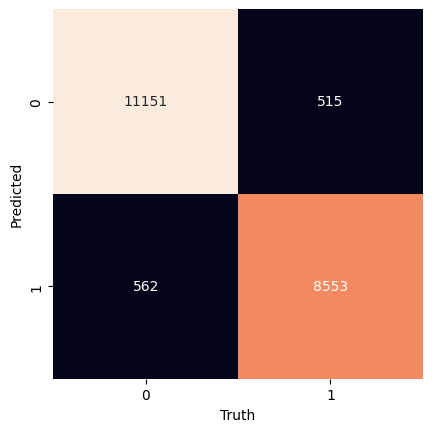

In [128]:
mat = confusion_matrix(result, Y_target)
names = np.unique(result)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=names, yticklabels=names)
plt.xlabel('Truth')
plt.ylabel('Predicted')

## Comparing with test.csv

In [129]:
Y_pred = DT.predict(df_test)

In [130]:
accuracy_score(Y_pred, df_test_target) * 100

94.62580843855866

Text(113.9222222222222, 0.5, 'Predicted')

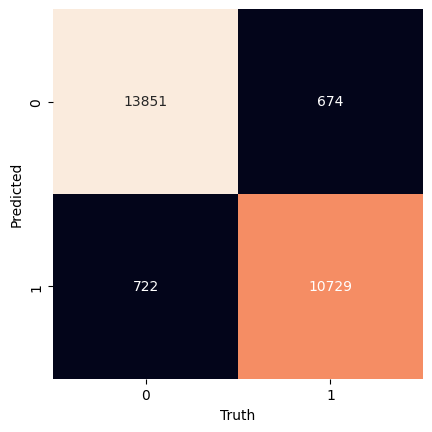

In [131]:
mat = confusion_matrix(Y_pred, df_test_target)
names = np.unique(Y_pred)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=names, yticklabels=names)
plt.xlabel('Truth')
plt.ylabel('Predicted')